*Prepared for the course "TDPS22: Data Science Programming" at Jönköping University, Teacher: [Marcel Bollmann](mailto:marcel.bollmann@ju.se)*

# Exercise 2: Visualization with Seaborn for Exploratory Data Analysis


This notebook contains exercises on data visualization using the Seaborn library. In particular, we'll focus on _exploratory data analysis:_ trying to understand your dataset better by producing plots. This exercise focuses on what different plot types there are, how to use them, and what they mean.

### Learning Goals

- Understand how to produce plots with the help of the Seaborn API.
- Know how to _find the right Seaborn functions_ for a given plot type.
- Know how to _interpret common plot types_ provided by Seaborn.

### Useful Resources

+ ["Visualization with Seaborn" in the Python Data Science Handbook](https://jakevdp.github.io/PythonDataScienceHandbook/04.14-visualization-with-seaborn.html)
+ ["Plotting with Pandas and Seaborn" in Python for Data Analysis](https://wesmckinney.com/book/plotting-and-visualization.html#vis_pandas)
+ [Seaborn User Guide & Tutorial](https://seaborn.pydata.org/tutorial.html)


In [1]:
try:
    from rich import load_ipython_extension
    %load_ext rich
except ImportError:
    try:
        from rich import pretty
        pretty.install()
    except ImportError:
        pass

In [2]:
%matplotlib inline
import pandas as pd
import seaborn as sns

sns.set()

In [3]:
# Load a predefined dataset from Seaborn
df = sns.load_dataset("penguins")
df

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


- - - 
## Data cleaning

We can already see from the preview of `df` above that this dataset contains null values (`NaN`)! Let's recall our Pandas skills to tidy this up before we do anything else.

#### Useful Reference

+ ["Handling Missing Data" in the Python Data Science Handbook](https://jakevdp.github.io/PythonDataScienceHandbook/03.04-missing-values.html)

**1. How many `NaN` values are there in each column?** This information might help us decide what strategy we want to use for cleaning the dataset.

In [5]:
# Your code here
df.isnull().sum()

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64

**2. Drop all rows that contain `NaN` values from the dataset.** Make sure to assign the result to `df` so that for the remaining exercises, we're working with the cleaned dataset.

In [8]:
# Your code here
df = df.dropna()
df

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male
...,...,...,...,...,...,...,...
338,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,Female
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


**3. Find out which unique values there are for `species` and `island`, as well as the min/max/mean of the numeric columns.** This might be helpful in deciding how to visualize this dataset later!

In [14]:
# Your code here
df["species"].unique()

df["island"].unique()

df["bill_length_mm"].describe()
df["bill_depth_mm"].describe()
df["flipper_length_mm"].describe()
df["body_mass_g"].describe()

count    333.000000
mean      43.992793
std        5.468668
min       32.100000
25%       39.500000
50%       44.500000
75%       48.600000
max       59.600000
Name: bill_length_mm, dtype: float64

- - -
## Plotting data distributions

Let's get a better what the idea looks like by visualizing it!
Maybe we want to know more about the **distribution** of our data. With functions like `df.describe()`, we already get a rough overview about minima, maxima, quantiles, averages, etc. – but plots can give us an ever better picture of the data.

#### Useful References

+ ["Plotting with Pandas and Seaborn" in Python for Data Analysis](https://wesmckinney.com/book/plotting-and-visualization.html#vis_pandas)
+ ["Visualizing distributions of data" in the Seaborn tutorial](https://seaborn.pydata.org/tutorial/distributions.html)

**4. Produce a histogram of the penguins' _body mass_ measurements with 12 bins.**  You could do this by using (a) the Pandas API, or (b) the Seaborn API. In practice (and in the assignments/exam), it does not matter _how_ you arrive at a solution – but it can be a good exercise to try out different ways to achieve the same result. How do the plots generated by these two different methods differ? Could you explain what they tell us about the distribution of the body mass?

<AxesSubplot:ylabel='Frequency'>

<Figure size 432x288 with 1 Axes>

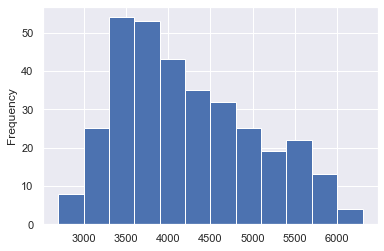

In [16]:
# Your code here - using Pandas API
df["body_mass_g"].plot.hist(bins = 12)

<AxesSubplot:xlabel='body_mass_g', ylabel='Count'>

<Figure size 432x288 with 1 Axes>

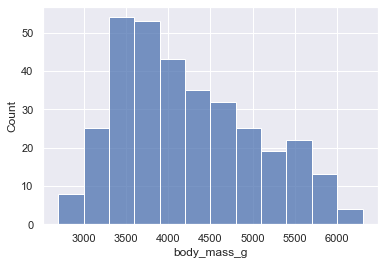

In [18]:
# Your code here - using Seaborn API
sns.histplot(data = df, x = "body_mass_g", bins=12)

**5. Produce a histogram of _body mass_ that also conditions on _sex_.** In other words, play around with visualizations that show the distribution of body mass separately for male and female penguins.

There are different ways to do this: one is by using different colors (hues) in the histogram to distinguish male and female penguins. Seaborn makes this really, really easy! Focus on the Seaborn tutorial pages to figure out how to do this, and try out the different options Seaborn provides to combine the histogram bars (e.g., "stacking" vs. "layering" vs. "dodging"). Which option, in your opinion, provides the most useful visualization in this case?

<AxesSubplot:xlabel='body_mass_g', ylabel='Count'>

<Figure size 432x288 with 1 Axes>

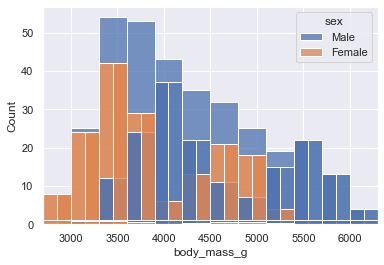

In [24]:
# Your code here
sns.histplot(data = df, x = "body_mass_g", hue = "sex", bins=12, multiple = "stack")
sns.histplot(data = df, x = "body_mass_g", hue = "sex", bins=12, multiple = "layer")
sns.histplot(data = df, x = "body_mass_g", hue = "sex", bins=12, multiple = "dodge")
sns.histplot(data = df, x = "body_mass_g", hue = "sex", bins=12, multiple = "fill")

**6. Do the same but with different variables, e.g., "bill length" instead of "body mass", or "species" instead of "sex" as the conditional variable.** Remember, this is exploratory data analysis – you're trying to learn something about the dataset and get a better feel for how the data is distributed. There is no "right" or "wrong" plot to produce here, just plots that may be more or less useful for understanding the dataset.

<AxesSubplot:xlabel='bill_length_mm', ylabel='Count'>

<Figure size 432x288 with 1 Axes>

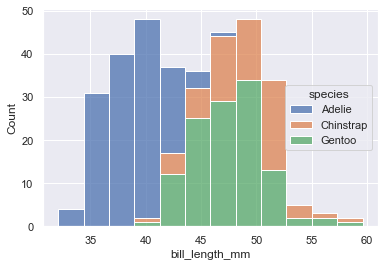

In [25]:
# Your code here
sns.histplot(data = df, x = "bill_length_mm", hue = "species", bins=12, multiple = "stack")

**7. Turn one of your histograms into a KDE plot.** Again, Seaborn makes this easy by just changing one keyword argument. But what does that KDE plot tell you? How does it differ from the histogram? Which one do you find more useful on the variables you looked at?

<AxesSubplot:xlabel='bill_length_mm', ylabel='Density'>

<Figure size 432x288 with 1 Axes>

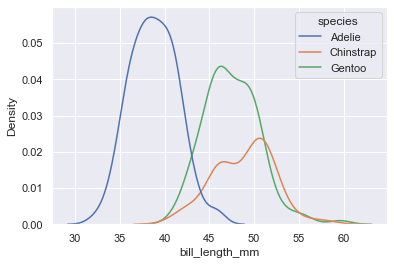

In [4]:
# Your code here
sns.kdeplot(data = df, x = "bill_length_mm", hue = "species")

- - -
## Plotting relationships between variables

Previously, we visualized the distribution of one _numeric_ variable, optionally conditioned on one _categorical_ variable. Now, let's extend this to plot relationships between multiple numeric and/or categorical variables.

#### Useful References

+ ["Plotting with Pandas and Seaborn" in Python for Data Analysis](https://wesmckinney.com/book/plotting-and-visualization.html#vis_pandas)
+ ["Visualizing statistical relationships" in the Seaborn tutorial](https://seaborn.pydata.org/tutorial/relational.html)
+ ["Visualizing regression models" in the Seaborn tutorial](https://seaborn.pydata.org/tutorial/regression.html#visualizing-regression-models)

Let's show the relationship between two _numeric_ variables:

**8. Make a scatter plot showing the relationship between _bill length_ and _body mass_.** For example, you could show the bill length on the *x*-axis and the body mass on the *y*-axis.

<AxesSubplot:xlabel='bill_length_mm', ylabel='body_mass_g'>

<Figure size 432x288 with 1 Axes>

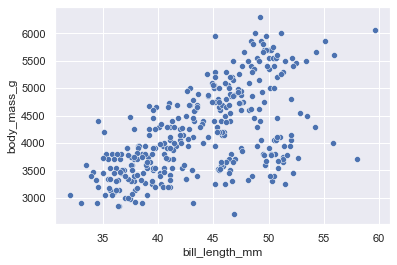

In [6]:
# Your code here
sns.scatterplot(data = df, x = "bill_length_mm", y = "body_mass_g")

Let's add a categorical variable, so that we're now visualizing _three_ different variables in one plot:

**9. Make the same scatter plot as in Q8, but add _color_ (or, as Seaborn calls it, _hue_) to condition on the _species_ of the penguins.**

<AxesSubplot:xlabel='bill_length_mm', ylabel='body_mass_g'>

<Figure size 432x288 with 1 Axes>

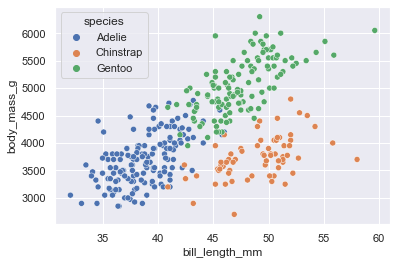

In [7]:
# Your code here
sns.scatterplot(data = df, x = "bill_length_mm", y = "body_mass_g", hue = "species")

Seaborn can conveniently perform some basic _modelling_ on the data as well. Based on the plots above, we might feel pretty sure that there's strong correlation between _bill length_ and _body mass_, but we can also quickly perform & plot a linear regression model to support this.

**10. Plot a _linear regression_ between _bill length_ and _body mass_, both with and without conditioning on the _species_.**  Note that you'll need to use a different Seaborn function for the latter case, although the parameters don't change much.

<AxesSubplot:xlabel='bill_length_mm', ylabel='body_mass_g'>

<Figure size 432x288 with 1 Axes>

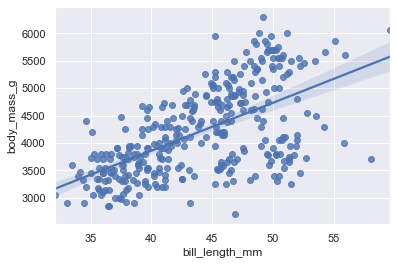

In [8]:
# Your code here - "simple" linear regression (WITHOUT conditioning on the species)
sns.regplot(x = "bill_length_mm", y = "body_mass_g", data = df)

<seaborn.axisgrid.FacetGrid object at 0x7f7ff0286be0>

<Figure size 446.85x360 with 1 Axes>

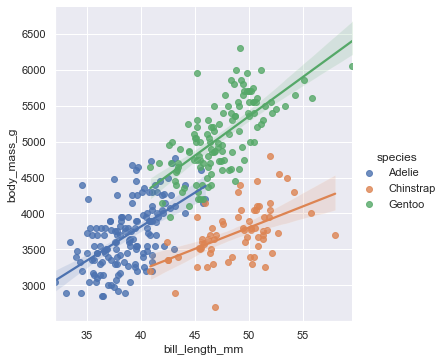

In [9]:
# Your code here - multiple linear regressions (conditioning on the species)
sns.lmplot(x = "bill_length_mm", y = "body_mass_g", hue = "species", data = df)

Let's extend our visualization to _four_ variables. Seaborn offers "facet grids" as a way to quickly produce multiple plots in a grid, where the columns (and/or rows) represent our fourth variable.

**11. Make a _facet grid_ that's the same as Q9, but distinguishes the _sex_ of the penguins in separate columns.**  In other words, you should end up with two plots analogous to the plot from Q9, but the first only shows data from "Male" penguins, while the second only shows data from "Female" penguins. You don't need to do any Pandas data manipulation for that – Seaborn can plot this with a single function call!

<seaborn.axisgrid.FacetGrid object at 0x7f7fc33a8190>

<Figure size 432x216 with 2 Axes>

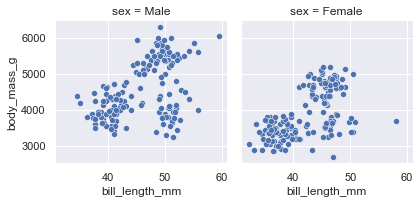

In [10]:
# Your code here
f_g = sns.FacetGrid(df, col = "sex")
f_g.map(sns.scatterplot, "bill_length_mm", "body_mass_g")

- - - 
## Plotting categorical data

Columns like "species" or "sex" represent _categorical_ variables. We've used them in the plots above before, but let's look at some plot types specifically made for categorical data.


#### Useful References

+ ["Plotting with Pandas and Seaborn" in Python for Data Analysis](https://wesmckinney.com/book/plotting-and-visualization.html#vis_pandas)
+ ["Plotting with categorical data" in the Seaborn tutorial](https://seaborn.pydata.org/tutorial/categorical.html)

We've previously looked at _histograms_ to see, e.g., the distribution of _bill length_ by _species_. We did this by distinguishing the different _species_ by color in a single histogram. We can also do that with a categorical scatter plot and/or box plot.

**12. Make a _categorical scatter plot_ that uses _species_ as the categorical variable, and _bill length_ as the numeric variable.** If you haven't plotted the same relationship as a histogram already (in Q6), do this too, and compare this scatter plot and the histogram. Can you see that they visualize the same information? Which one do you find more useful here?

<seaborn.axisgrid.FacetGrid object at 0x7f7fc33af310>

<Figure size 360x360 with 1 Axes>

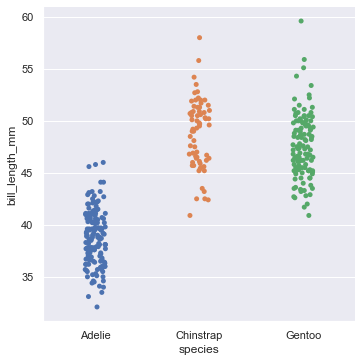

In [12]:
# Your code here
sns.catplot(x = "species", y = "bill_length_mm", data = df)

**13. Make a _box plot_ analogous to Q12, i.e., using _species_ as the categorical variable, and _bill length_ as the numeric variable.** Do you know how to interpret the resulting plot? What do the boxes and lines mean?

<AxesSubplot:xlabel='species', ylabel='bill_length_mm'>

<Figure size 432x288 with 1 Axes>

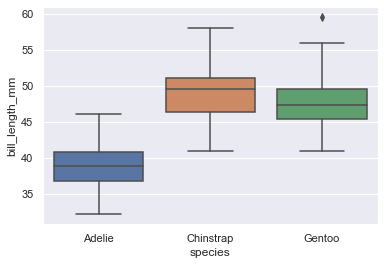

In [13]:
# Your code here
sns.boxplot(x = "species", y = "bill_length_mm", data = df)

A categorical variable we haven't looked at so far is the _island_ where the penguins live. Let's see how many penguins of each _species_ live on each _island_.

**14. Make a _bar plot_ showing the count of penguins, conditioned on _island_ and _species_.** (_Hint:_ Seaborn calls this a "count plot".)

<AxesSubplot:xlabel='island', ylabel='count'>

<Figure size 432x288 with 1 Axes>

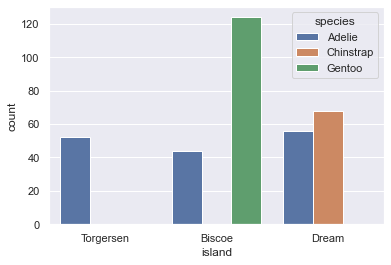

In [14]:
# Your code here
sns.countplot(x = "island", hue ="species", data = df)

- - -
## Plotting time series data

**This part requires the data files from Exercise 1.**
 
Since the Penguins dataset doesn't really contain any time series, let's turn to the coffee chain dataset from the last exercise again. We'll load it and make sure the `Ddate` column contains an actual Datetime object:

In [16]:
coffee = pd.read_csv("Exercise_01_Pandas/data/coffee-chain.csv")
coffee["Ddate"] = coffee["Ddate"].transform(pd.to_datetime)
coffee

,Ddate,Market,Product,Product Type,Sales,Profit,Expenses
0,2013-09-01,Central,Decaf Irish Cream,Coffee,90,36,37
1,2012-05-01,East,Decaf Espresso,Espresso,203,56,55
2,2013-01-01,West,Caffe Latte,Espresso,524,136,93
3,2012-08-01,West,Earl Grey,Tea,273,81,68
4,2013-12-01,West,Amaretto,Coffee,201,-3,68
...,...,...,...,...,...,...,...
9995,2012-02-01,Central,Darjeeling,Tea,185,59,39
9996,2012-03-01,East,Darjeeling,Tea,88,17,36
9997,2013-08-01,Central,Chamomile,Herbal Tea,61,21,21
9998,2012-04-01,East,Caffe Mocha,Espresso,124,38,84


**15. Make a _line plot_ showing the relationship between _date_ and _sales_.**

<AxesSubplot:xlabel='Ddate', ylabel='Sales'>

<Figure size 432x288 with 1 Axes>

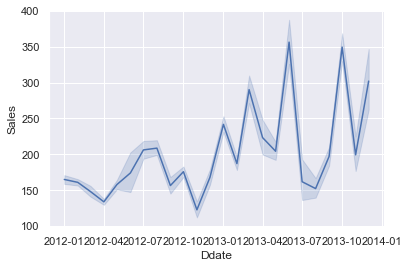

In [17]:
# Your code here
sns.lineplot(data = coffee, x = "Ddate", y = "Sales")

We have several numeric values in this dataset: _sales, profit,_ and _expenses._ It would make sense to combine all three in a single plot, distinguishing them by color. But we're running into a small problem here: these observations are in different _columns_ of the DataFrame. To use precise terminology, these variables are represented as _wide-form data_.

**16. Make a _line plot_ showing the relationship between _date_ and the three numeric variables _sales, profit, expenses,_ plotted as separate lines in different colors.**

_Hint:_ Look at ["Data structures accepted by seaborn"](https://seaborn.pydata.org/tutorial/data_structure.html) to figure out how to plot _wide-form data_ as in our case here.

<AxesSubplot:xlabel='Ddate', ylabel='Sales'>

<Figure size 432x288 with 1 Axes>

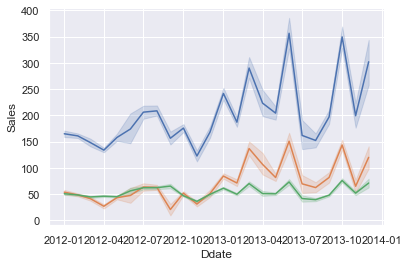

In [23]:
# Your code here
sns.lineplot(data = coffee, x = "Ddate", y = "Sales")
sns.lineplot(data = coffee, x = "Ddate", y = "Profit")
sns.lineplot(data = coffee, x = "Ddate", y = "Expenses")